In [1]:
import sys, os
import numpy as np
import torch
import yaml
import pickle as pk
# autoreload modules
%load_ext autoreload
%autoreload 2

import matplotlib
%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np
import sys,os
import readgadget
import MAS_library as MASL
import pickle as pk
import readfof
import matplotlib

import matplotlib.pyplot as pl
pl.rc('text', usetex=True)
# Palatino
pl.rc('font', family='DejaVu Sans')
%matplotlib inline



%load_ext Cython


        
        
        



In [2]:
import readfof
import sys, os
import numpy as np
import pickle as pk 
# from nbodykit.lab import *
import h5py as h5
import numpy as np
import Pk_library as PKL
import MAS_library as MASL
import yaml
# import galactic_wavelets as gw



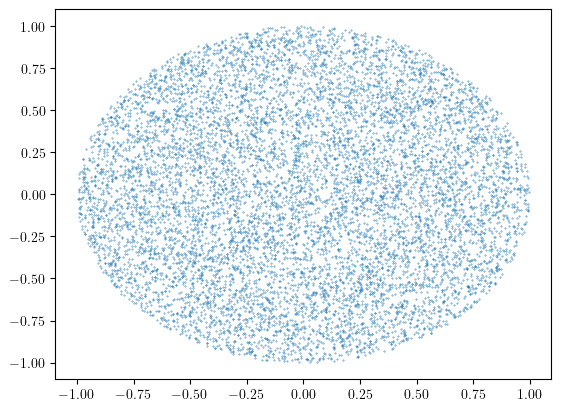

In [7]:
nsamp = 10000
r2 = np.random.uniform(0, 1, size=nsamp)
# theta = 2*np.pi*r2
theta = 2*np.pi*np.random.uniform(0, 1, size=nsamp)
r = np.sqrt(r2)
x = r*np.cos(theta)
y = r*np.sin(theta)

pl.figure()
pl.scatter(x,y, s=0.1)




In [8]:
import numpy as np

class LinearRegression:
    def fit(self, X, y):
        # Add bias term to the feature matrix X
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        
        # Calculate the optimal weights using the normal equation
        self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    
    def predict(self, X):
        # Add bias term to the feature matrix X
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        
        # Predict the target variable
        y_pred = X_b.dot(self.theta)
        return y_pred

# Example usage:
# Create some sample data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict using the trained model
y_pred = model.predict(X)
print("Predicted values:", y_pred)

# Print the coefficients

print("Coefficients:", model.theta)

Predicted values: [2.8 3.4 4.  4.6 5.2]
Coefficients: [2.2 0.6]


In [10]:
# X.shape
import numpy as np

def rotate_point(x, y):
    angle_rad = np.deg2rad(45)  # Convert angle to radians
    rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                                [np.sin(angle_rad), np.cos(angle_rad)]])
    point = np.array([x, y])
    rotated_point = rotation_matrix.dot(point)
    return rotated_point


    


In [11]:
Xrand = np.random.uniform(0,1, 1000)
Yrand = np.random.uniform(0,1, 1000)

# Xrand_rs = Xrand[:,np.newaxis]
Xrand_rt, Yrand_rt = rotate_point(x, y)



ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [12]:
Xrand_rt.shape, Yrand_rt.shape



NameError: name 'Xrand_rt' is not defined

In [3]:
df = pk.load(open('/mnt/home/spandey/ceph/CHARFORMER/data/df_halo_part_ngp_xyzM_tokenized_density3Dgrid_32_isim_3_snap_3.pkl','rb'))

dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed_0 = df['dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed']
dfhalo_ngp_wxyzM_0 = df['dfhalo_ngp_wxyzM']
Nhalos_truth_0 = df['Nhalos_truth']
delta_box_all_squeezed_0 = df['delta_box_all_squeezed']




In [4]:
grid = 32
shift_x_all, shift_y_all, shift_z_all = np.zeros((grid, grid, grid)), np.zeros((grid, grid, grid)), np.zeros((grid, grid, grid))
for jx in range(grid):
    for jy in range(grid):
        for jz in range(grid):
            shift_x_all[jx, jy, jz] = jx
            shift_y_all[jx, jy, jz] = jy
            shift_z_all[jx, jy, jz] = jz

shift_x_all_squeezed, shift_y_all_squeezed, shift_z_all_squeezed = shift_x_all.flatten(), shift_y_all.flatten(), shift_z_all.flatten()
shift_all_squeezed = np.vstack([shift_x_all_squeezed, shift_y_all_squeezed, shift_z_all_squeezed]).T



In [5]:
dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed_0.shape, delta_box_all_squeezed_0.shape


((32768, 161), (32768, 32, 32, 32, 3))

In [6]:
from test_ddp import *


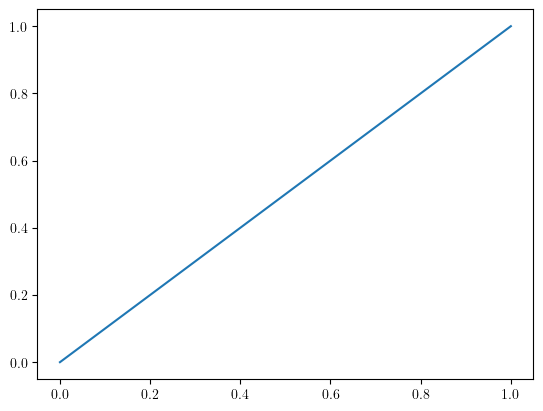

In [7]:
pl.figure()
pl.plot([0,1],[0,1])


In [8]:
dev = torch.device("cuda")
model = HaloDecoderModel(HaloConfig).to(dev)
# if rank == 0: print(f"Init model and loaded to GPU", flush=True)            
# model.to(device).bfloat16()
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

# scaler = torch.cuda.amp.GradScaler(enabled=(dtype == 'float16'))



number of parameters: 0.40M


In [9]:
checkpoint = torch.load('/mnt/home/spandey/ceph/CHARFORMER/model_checkpoints/model_encdec_testddp.pt')



In [10]:
model.load_state_dict(checkpoint['model'])



<All keys matched successfully>

In [11]:
model.eval()
print()

In [12]:
n1 = 32**3
test_data_halos = dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed_0[:n1]

test_data_dm = delta_box_all_squeezed_0[:n1]

x = torch.tensor(test_data_halos[:, :-1])
y = torch.tensor(test_data_halos[:, 1:])
dm = torch.tensor(test_data_dm)
mask_test_orig = x != 1
mask_test = torch.logical_not(mask_test_orig)
masked_logits = torch.zeros(mask_test.shape)
mask_test_final = masked_logits.masked_fill(mask_test, float('-inf'))
mask_test = mask_test_final[:,None,:]
x, y = torch.tensor(x), torch.tensor(y)
x_test = x.long()
y_test = y.long()
dm_test = dm.bfloat16()
mask_test = torch.tensor(mask_test).bfloat16()




/tmp/ipykernel_2099269/1321212745.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x), torch.tensor(y)
/tmp/ipykernel_2099269/1321212745.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask_test = torch.tensor(mask_test).bfloat16()


In [13]:
dm_test.shape


torch.Size([32768, 32, 32, 32, 3])

In [14]:
x_test_gpu = x_test.to(dev)
y_test_gpu = y_test.to(dev)
dm_test_gpu = dm_test.to(dev)
mask_test_gpu = mask_test.to(dev)




In [15]:
def get_batch(split, ji=0, batch_size=None):
    if split == 'train':
        x = x_train_gpu
        y = y_train_gpu
        mask = mask_train_gpu
        dm = dm_train_gpu

    elif split == 'val':
        x = x_val_gpu
        y = y_val_gpu
        mask = mask_val_gpu
        dm = dm_val_gpu

    elif split == 'test':
        x = x_test_gpu
        y = y_test_gpu
        mask = mask_test_gpu
        dm = dm_test_gpu        

    if batch_size is not None:
        x = x[batch_size*(ji):batch_size*(ji+1)].to(dev, non_blocking=True)
        y = y[batch_size*(ji):batch_size*(ji+1)].to(dev, non_blocking=True)
        mask = mask[batch_size*(ji):batch_size*(ji+1)].to(dev, non_blocking=True)
        dm = dm[batch_size*(ji):batch_size*(ji+1)].to(dev, non_blocking=True)

    return x, y, mask, dm

    

In [16]:
batch_size = 32**3
X_val, Y_val, MASK_val, DM_val = get_batch('test', 0, batch_size)
DM_val = torch.moveaxis(DM_val, -1, 1)
# DM_val.shape



In [17]:
DM_val.shape

torch.Size([32768, 3, 32, 32, 32])

In [18]:
DM_val_tosplit = DM_val.detach().cpu().to(torch.float16).numpy()[:batch_size, 0,:,:,:].reshape(batch_size, DM_val.shape[-1]**3)
DM_val_tosplit_mean = np.mean(DM_val_tosplit, axis=-1)



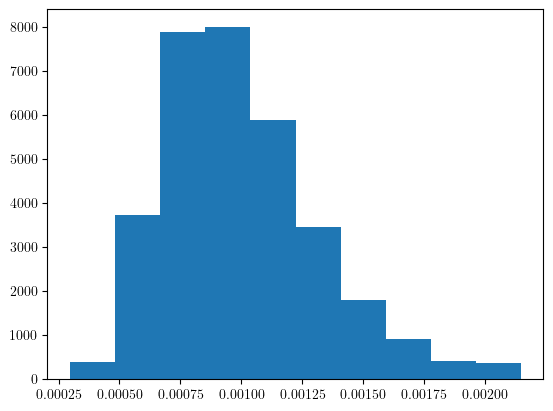

In [19]:

pl.figure()
_ = pl.hist(DM_val_tosplit_mean)



In [20]:
vlow = 0.00075
vmid = 0.0017

indlow = np.where(DM_val_tosplit_mean < vlow)[0]
indmid = np.where((DM_val_tosplit_mean >= vlow) & (DM_val_tosplit_mean < vmid))[0]
indhigh = np.where(DM_val_tosplit_mean >= vmid)[0]

print(len(indlow), len(indmid), len(indhigh))




7331 24383 1054


In [21]:
model = model.bfloat16()


In [22]:
# max_new_tokens = 160
# end_token = 129
# nvox_samp = 1024
# nbatches = 32
# nvox_per_batch = nvox_samp // nbatches

# # jb = 0
# # idx_inp = torch.zeros((nvox_per_batch, 1), dtype=torch.long, device=dev)
# # DM_val_jb = DM_val[jb*nvox_per_batch:(jb+1)*nvox_per_batch,...]

# # idx = idx_inp



In [23]:
# # crop idx to the last block_size tokens
# # idx_cond = idx[:, -block_size:]
# idx_cond = idx
# # get the predictions
# logits, loss = model(idx_cond, DM_val_jb)
# # focus only on the last time step
# logits = logits[:, -1, :] # becomes (B, C)
# # apply softmax to get probabilities
# probs = F.softmax(logits, dim=-1) # (B, C)
# # sample from the distribution
# idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)



In [24]:
# idx_next.shape
32**3/32


1024.0

In [25]:
from tqdm import tqdm
max_new_tokens = 160
end_token = 129
nvox_samp = 32**3
nbatches = 16
nvox_per_batch = nvox_samp // nbatches

# idx_all = []
# idx_all = torch.ones((nvox_samp, max_new_tokens), dtype=torch.long, device=dev)
idx_all = np.ones((nvox_samp, max_new_tokens))
for jb in tqdm(range(nbatches)):

    idx_inp = torch.zeros((nvox_per_batch, 1), dtype=torch.long, device=dev)

    DM_val_jb = DM_val[jb*nvox_per_batch:(jb+1)*nvox_per_batch,...]

    new_samples_jb = np.ones((nvox_per_batch, max_new_tokens))

    ind_jb = np.arange(nvox_per_batch)

    new_samples_jb[:, 0] = idx_inp[:,0].cpu().detach().numpy()
    # idx = idx_inp
    for jt in range(1, max_new_tokens):
        # crop idx to the last block_size tokens
        idx_cond = torch.tensor(new_samples_jb[ind_jb, :jt], dtype=torch.long, device=dev)
        # get the predictions
        logits, loss = model(idx_cond, DM_val_jb[ind_jb,...])
        # focus only on the last time step
        logits = logits[:, -1, :] # becomes (B, C)
        # apply softmax to get probabilities
        probs = F.softmax(logits, dim=-1) # (B, C)
        # sample from the distribution
        idx_next = torch.multinomial(probs, num_samples=1).cpu().detach().numpy() # (B, 1)

        # append sampled index to the running sequence
        # if idx_next == end_token:
            # break
        new_samples_jb[ind_jb, jt] = idx_next[:,0]
        ind_to_del = np.where(idx_next == end_token)[0]
        # for jv in range(len(ind_jb)):
            # if idx_next[jv, 0] == end_token:
        ind_jb = np.delete(ind_jb, ind_to_del)


        # print(new_samples_jb[0,:])
        # idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
    idx_all[jb*nvox_per_batch:(jb+1)*nvox_per_batch, :] = new_samples_jb
    # idx_all.append(idx)




  0%|          | 0/16 [00:00<?, ?it/s]

100%|██████████| 16/16 [02:49<00:00, 10.60s/it]


In [26]:
X_val.shape, idx_all.shape


(torch.Size([32768, 160]), (32768, 160))

In [27]:
# idx_all[0,:]
# new_samples_jb.shape, idx_inp.shape
# 2+2

# idx_all
# idx_next.shape, ind_jb.shape
# ind_jb

# idx_next

In [28]:
# from tqdm import tqdm
# idx_inp = torch.zeros((1, 1), dtype=torch.long, device=dev)
# # nvox_samp = len(indhigh)
# nvox_samp = 1024
# max_new_tokens = 160
# end_token = 129
# idx_all = []
# for jv in tqdm(range(nvox_samp)):
#     ind_jv = indhigh[jv]
#     DM_val_jv = DM_val[ind_jv,...]
#     idx = idx_inp
#     for _ in range(max_new_tokens):
#         # crop idx to the last block_size tokens
#         idx_cond = idx[:, -block_size:]
#         # get the predictions
#         logits, loss = model(idx_cond, DM_val_jv.unsqueeze(0))
#         # focus only on the last time step
#         logits = logits[:, -1, :] # becomes (B, C)
#         # apply softmax to get probabilities
#         probs = F.softmax(logits, dim=-1) # (B, C)
#         # sample from the distribution
#         idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
#         # append sampled index to the running sequence
#         if idx_next == end_token:
#             break
#         idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
#     idx_all.append(idx)
    

In [29]:
Mmin_cut = 1e13
lgMin = np.log10(Mmin_cut)
lgMax = 15.5

BoxSize = 1000.
grid = 32
xmin = BoxSize/grid/2



In [30]:
nvocab = 128
bins_digitize = np.linspace(-1e-3, 1, nvocab)
# bins_digitize.insert(0, -1)
bins_digitize = np.insert(bins_digitize, 0, -1)


start_token = 0
pad_token = 1
end_token = nvocab + 1
space_token = nvocab + 2


In [31]:
# nvox_samp


In [68]:
Nhalo_all_truth = []
Mhalo_all_truth = []
pos_all_truth = []
Pk_all_truth = []

MAS     = 'NGP'  #mass-assigment scheme
grid_Pk = 16
threads = 10

for jv in range(nvox_samp):
# for jv in indhigh[:nvox_samp]:    
    idx = X_val[jv]
    idx = idx.cpu().numpy().flatten().astype(int)
    # idx = idx[1:]
    # idx = idx[:np.where(idx == end_token)[0][0]]
    # idx = idx.reshape(-1, 5)
    idxe = np.where(idx == space_token)[0] + 1
    idx0 = np.where(idx == start_token)[0] + 1
    # check with idx0 is a scalar or an array:
    # try:
        # temp = len(idx0)
        # print(temp)
    # except:
    if len(idx0) == 1:
        Nhalo = len(idxe) + len(idx0)
        Nhalo_all_truth.append(Nhalo)
        pos_halo = np.zeros((Nhalo, 3))
        if Nhalo > 0:
            try:
                Mhalo = np.zeros(Nhalo)
                for jh in range(Nhalo):
                    if jh == 0:
                        Mhalo[jh] = bins_digitize[idx[idx0]] * (lgMax - lgMin) + lgMin
                        for jx in range(3):
                            # if jx == 0:
                            shift_coord = shift_all_squeezed[jv, jx] * (2 * xmin)
                            pos_halo[jh, jx] = bins_digitize[idx[idx0 + jx + 1]] * 2 * xmin  + shift_coord        

                    else:
                        if Nhalo > 2:
                            Mhalo[jh] = bins_digitize[idx[idxe[jh-1]]] * (lgMax - lgMin) + lgMin
                            for jx in range(3):
                                shift_coord = shift_all_squeezed[jv, jx] * (2 * xmin)
                                pos_halo[jh, jx] = bins_digitize[idx[idxe[jh-1] + jx + 1]] * 2 * xmin  + shift_coord               

                        else:
                            Mhalo[jh] = bins_digitize[idx[idxe]] * (lgMax - lgMin) + lgMin
                            for jx in range(3):
                                shift_coord = shift_all_squeezed[jv, jx] * (2 * xmin)
                                pos_halo[jh, jx] = bins_digitize[idx[idxe + jx + 1]] * 2 * xmin  + shift_coord                 

                Mhalo_all_truth.append(Mhalo)
                pos_all_truth.append(pos_halo)

                if Nhalo > 5:
                    mesh_truth = np.zeros((grid_Pk, grid_Pk, grid_Pk), dtype=np.float32)
                    MASL.MA(pos_halo.astype(np.float32), mesh_truth, 2*xmin, MAS)
                    mesh_truth /= np.mean(mesh_truth, dtype=np.float64);  mesh_truth -= 1.0
                    Pk_truth = PKL.Pk(mesh_truth, 2*xmin, axis=0, MAS=None, threads=threads, verbose=False)
                    Pk_all_truth.append(Pk_truth.Pk[:,0])
                else:
                    Pk_all_truth.append([])

            except:
                Mhalo_all_truth.append(np.array([]))
                pos_all_truth.append(np.array([]))
                Pk_all_truth.append([])
                pass
        else:
            Mhalo_all_truth.append(np.array([]))
            pos_all_truth.append(np.array([]))
            Pk_all_truth.append([])
    else:
        Nhalo_all_truth.append(np.array([]))
        Mhalo_all_truth.append(np.array([]))
        pos_all_truth.append(np.array([]))
        Pk_all_truth.append([])


/tmp/ipykernel_2099269/2507159967.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Mhalo[jh] = bins_digitize[idx[idx0]] * (lgMax - lgMin) + lgMin
/tmp/ipykernel_2099269/2507159967.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pos_halo[jh, jx] = bins_digitize[idx[idx0 + jx + 1]] * 2 * xmin  + shift_coord
/tmp/ipykernel_2099269/2507159967.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Mhalo[jh] = bins_digitize[idx[idxe]] * (lgMax - lgMin) + lgMin
/tm

In [76]:
idx0, idxe


array([ 6, 11, 16, 21, 26, 31])

In [77]:
Nhalo_all = []
Mhalo_all = []
pos_all = []
Pk_all = []


for jv in range(nvox_samp):
# for jv in indhigh[:nvox_samp]:    
    idx = idx_all[jv].astype(int)
    idx = idx.flatten()
    # idx = idx[1:]
    # idx = idx[:np.where(idx == end_token)[0][0]]
    # idx = idx.reshape(-1, 5)
    idxe = np.where(idx == space_token)[0] + 1
    idx0 = np.where(idx == start_token)[0] + 1
    # check with idx0 is a scalar or an array:
    # try:
        # temp = len(idx0)
        # print(temp)
    # except:
    if len(idx0) == 1:
        Nhalo = len(idxe) + len(idx0)
        Nhalo_all.append(Nhalo)
        pos_halo = np.zeros((Nhalo, 3))
        if Nhalo > 0:
            try:
                Mhalo = np.zeros(Nhalo)
                for jh in range(Nhalo):
                    if jh == 0:
                        Mhalo[jh] = bins_digitize[idx[idx0]] * (lgMax - lgMin) + lgMin
                        for jx in range(3):
                            shift_coord = shift_all_squeezed[jv, jx] * (2 * xmin)
                            pos_halo[jh, jx] = bins_digitize[idx[idx0 + jx + 1]] * 2 * xmin + shift_coord           

                    else:
                        if Nhalo > 2:
                            Mhalo[jh] = bins_digitize[idx[idxe[jh-1]]] * (lgMax - lgMin) + lgMin
                            for jx in range(3):
                                shift_coord = shift_all_squeezed[jv, jx] * (2 * xmin)
                                pos_halo[jh, jx] = bins_digitize[idx[idxe[jh-1] + jx + 1]] * 2 * xmin  + shift_coord           

                        else:
                            Mhalo[jh] = bins_digitize[idx[idxe]] * (lgMax - lgMin) + lgMin
                            for jx in range(3):
                                shift_coord = shift_all_squeezed[jv, jx] * (2 * xmin)
                                pos_halo[jh, jx] = bins_digitize[idx[idxe + jx + 1]] * 2 * xmin  + shift_coord           


                Mhalo_all.append(Mhalo)
                pos_all.append(pos_halo)

                if Nhalo > 5:
                    mesh_truth = np.zeros((grid_Pk, grid_Pk, grid_Pk), dtype=np.float32)
                    MASL.MA(pos_halo.astype(np.float32), mesh_truth, 2*xmin, MAS)
                    mesh_truth /= np.mean(mesh_truth, dtype=np.float64);  mesh_truth -= 1.0
                    Pk_truth = PKL.Pk(mesh_truth, 2*xmin, axis=0, MAS=None, threads=threads, verbose=False)
                    Pk_all.append(Pk_truth.Pk[:,0])
                else:
                    Pk_all.append([])


            except Exception as e:
                Mhalo_all.append(np.array([]))
                pos_all.append(np.array([]))
                Pk_all.append([])
                print(e)
                pass

        else:
            Mhalo_all.append(np.array([]))
            pos_all.append(np.array([]))
            Pk_all.append([])

    else:
        Nhalo_all.append(np.array([]))
        Mhalo_all.append(np.array([]))
        pos_all.append(np.array([]))
        Pk_all.append([])



/tmp/ipykernel_2099269/3331823577.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Mhalo[jh] = bins_digitize[idx[idx0]] * (lgMax - lgMin) + lgMin
/tmp/ipykernel_2099269/3331823577.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pos_halo[jh, jx] = bins_digitize[idx[idx0 + jx + 1]] * 2 * xmin + shift_coord
/tmp/ipykernel_2099269/3331823577.py:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Mhalo[jh] = bins_digitize[idx[idxe]] * (lgMax - lgMin) + lgMin
/tmp

index 129 is out of bounds for axis 0 with size 129
index 130 is out of bounds for axis 0 with size 129


index 130 is out of bounds for axis 0 with size 129
index 130 is out of bounds for axis 0 with size 129
index 130 is out of bounds for axis 0 with size 129
index 130 is out of bounds for axis 0 with size 129
index 129 is out of bounds for axis 0 with size 129
index 130 is out of bounds for axis 0 with size 129
index 129 is out of bounds for axis 0 with size 129
index 130 is out of bounds for axis 0 with size 129
index 130 is out of bounds for axis 0 with size 129


In [72]:
indhigh



array([   23,    27,    28, ..., 32684, 32731, 32742])

Text(0, 0.5, '$\\Delta P(k)/P(k)$')

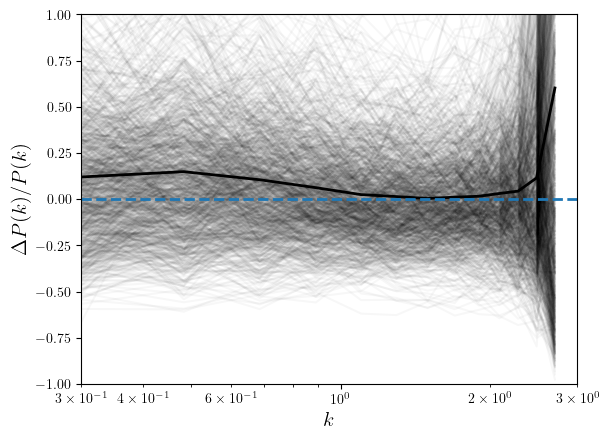

In [74]:
pl.figure()
resid_all = []
# for jp in range(len(Pk_all)):
for jp in indhigh:    
    if (len(Pk_all[jp]) > 0) and (len(Pk_all_truth[jp]) > 0):
        # pl.plot(Pk_truth.k3D, (Pk_all[jp] - Pk_all_truth[jp])/Pk_all_truth[jp], color='k', ls='-', alpha=0.0003)
        pl.plot(Pk_truth.k3D, (Pk_all[jp] - Pk_all_truth[jp])/Pk_all_truth[jp], color='k', ls='-', alpha=0.03)
        resid_all.append((Pk_all[jp] - Pk_all_truth[jp])/Pk_all_truth[jp])

resid_all = np.vstack(resid_all)
pl.plot(Pk_truth.k3D, np.mean(resid_all, axis=0), color='k', ls='-', alpha=1.0, lw=2.0)
pl.axhline(0.0, ls='--', lw=2.0)
pl.xscale('log')
pl.ylim(-1.0, 1.0)
pl.xlim(0.3, 3)
# pl.scale('log')
pl.xlabel(r'$k$', size=15)
pl.ylabel(r'$\Delta P(k)/P(k)$', size=15)




In [34]:
Mhalo_all_truth_concat = []
for jv in range(len(Mhalo_all_truth)):
    Mhalo_all_truth_concat.extend(Mhalo_all_truth[jv])

Mhalo_all_concat = []
for jv in range(len(Mhalo_all)):
    Mhalo_all_concat.extend(Mhalo_all[jv])  

    

In [35]:
pos_all_truth_concat = []
for jv in range(len(pos_all_truth)):
    if len(pos_all_truth[jv]) > 0:
        if len(pos_all_truth_concat) == 0:
            pos_all_truth_concat = pos_all_truth[jv]
        else:
            pos_all_truth_concat = np.vstack((pos_all_truth_concat, pos_all_truth[jv]))
        # pos_all_truth_concat.extend(pos_all_truth[jv])


    

In [36]:
pos_all_concat = []
for jv in range(len(pos_all)):
    if len(pos_all[jv]) > 0:
        if len(pos_all_concat) == 0:
            pos_all_concat = pos_all[jv]
        else:
            pos_all_concat = np.vstack((pos_all_concat, pos_all[jv]))
        # pos_all_concat.extend(pos_all[jv])  



In [37]:
# np.amin(pos_all_truth_concat[:,2]), np.amax(pos_all_truth_concat[:,2])
np.amin(pos_all_concat[:,2]), np.amax(pos_all_concat[:,2])
# pos_all_truth_concat.shape



(0.21505905511811022, 1000.0)

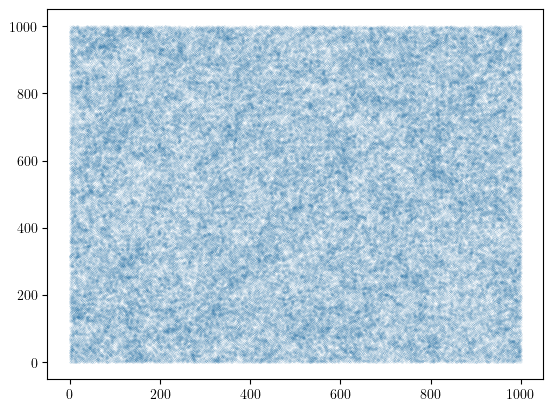

In [103]:
pl.figure()
pl.scatter(pos_all_truth_concat[:,0], pos_all_truth_concat[:,1], s=0.001)


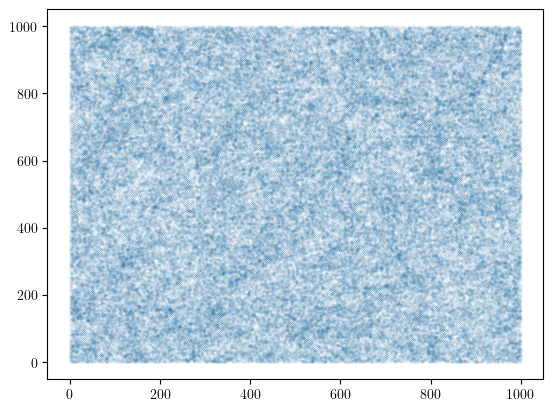

In [106]:
pl.figure()
pl.scatter(pos_all_concat[:,0], pos_all_concat[:,1], s=0.001)


In [61]:
grid_Pk = 512
threads = 10
MAS = 'CIC'
mesh_truth = np.zeros((grid_Pk, grid_Pk, grid_Pk), dtype=np.float32)
MASL.MA(pos_all_truth_concat.astype(np.float32), mesh_truth, 1000., MAS)
mesh_truth /= np.mean(mesh_truth, dtype=np.float64);  mesh_truth -= 1.0
Pk_truth = PKL.Pk(mesh_truth, 1000., axis=0, MAS=MAS, threads=threads, verbose=False)




In [62]:
grid_Pk = 512
threads = 10
MAS = 'CIC'
mesh_mock = np.zeros((grid_Pk, grid_Pk, grid_Pk), dtype=np.float32)
MASL.MA(pos_all_concat.astype(np.float32), mesh_mock, 1000., MAS)
mesh_mock /= np.mean(mesh_mock, dtype=np.float64);  mesh_mock -= 1.0
Pk_mock = PKL.Pk(mesh_mock, 1000., axis=0, MAS=MAS, threads=threads, verbose=False)




In [63]:
# Pk_mock.Pk[:,0]



Text(0, 0.5, '$\\Delta P(k)/P(k)$')

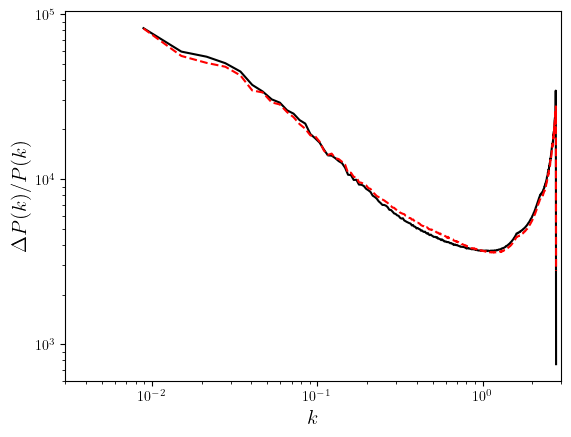

In [64]:
pl.figure()
pl.plot(Pk_truth.k3D, Pk_truth.Pk[:,0], color='k', ls='-', alpha=1.0)
pl.plot(Pk_mock.k3D, Pk_mock.Pk[:,0], color='r', ls='--', alpha=1.0)

# resid_all = np.vstack(resid_all)
# pl.plot(Pk_truth.k3D, np.mean(resid_all, axis=0), color='k', ls='-', alpha=1.0, lw=2.0)
# pl.axhline(0.0, ls='--', lw=2.0)
pl.xscale('log')
pl.yscale('log')
# pl.ylim(-1.0, 1.0)
pl.xlim(0.003, 3)
# pl.scale('log')
pl.xlabel(r'$k$', size=15)
pl.ylabel(r'$\Delta P(k)/P(k)$', size=15)




Text(0, 0.5, '$\\Delta P(k)/P(k)$')

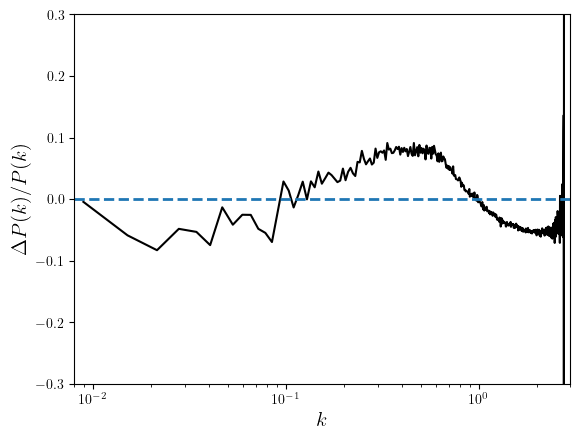

In [66]:
pl.figure()
pl.plot(Pk_truth.k3D, -1 + Pk_mock.Pk[:,0]/Pk_truth.Pk[:,0], color='k', ls='-', alpha=1.0)
# pl.plot(Pk_mock.k3D, Pk_mock.Pk[:,0], color='r', ls='--', alpha=1.0)

# resid_all = np.vstack(resid_all)
# pl.plot(Pk_truth.k3D, np.mean(resid_all, axis=0), color='k', ls='-', alpha=1.0, lw=2.0)
pl.axhline(0.0, ls='--', lw=2.0)
pl.xscale('log')
# pl.yscale('log')
pl.ylim(-0.3, 0.3)
pl.xlim(0.008, 3)
# pl.scale('log')
pl.xlabel(r'$k$', size=15)
pl.ylabel(r'$\Delta P(k)/P(k)$', size=15)




In [42]:
Nhalo_all_truth_concat = []
for jv in range(len(Nhalo_all_truth)):
    if type(Nhalo_all_truth[jv]) == int:
        Nhalo_all_truth_concat.append(Nhalo_all_truth[jv])

Nhalo_all_concat = []
for jv in range(len(Nhalo_all)):
    if type(Nhalo_all[jv]) == int:
        Nhalo_all_concat.append(Nhalo_all[jv])  

    

In [43]:
# 2+2
len(Nhalo_all_concat), len(Nhalo_all_truth_concat)
# Nhalo_all_concat[0:100]
# Nhalo_all[0]


(32761, 32043)

In [53]:
# Nhalo_all_hist
# Nhalo_all_concat[0:100]
bins_all

array([0])

In [54]:
bins_all = np.linspace(0,40, 40)
bins_cents = (bins_all[:-1] + bins_all[1:])/2
Nhalo_all_hist, _ = np.histogram(np.array(Nhalo_all_concat), bins= bins_all)
Nhalo_all_truth_hist, _ = np.histogram(np.array(Nhalo_all_truth_concat), bins= bins_all)


(0.0, 32.0)

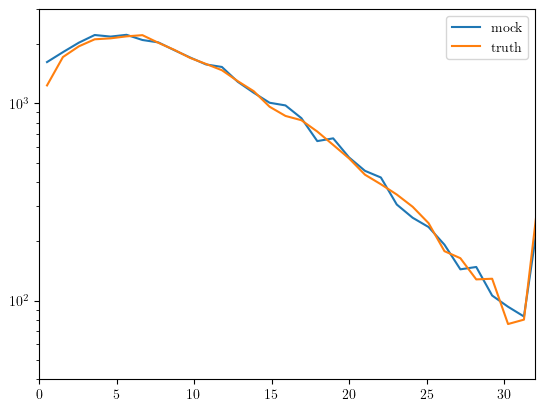

In [59]:
pl.figure()
pl.plot(bins_cents, Nhalo_all_hist, label='mock')
pl.plot(bins_cents, Nhalo_all_truth_hist, label='truth')
# _ = pl.hist(Nhalo_all_concat)
# _ = pl.hist(Nhalo_all_truth_concat)
pl.legend()
pl.yscale('log')
pl.ylim(40, 3000)
pl.xlim(0,32)




In [ ]:
pos_all_truth = []
Mhalo_all_truth = []
Nhalo_all_truth = []
# Pk_all_truth = []

BoxSize = 1000.
grid = 32
xmin = BoxSize/grid/2

MAS     = 'NGP'  #mass-assigment scheme
grid_Pk = 32
threads = 10

for jv in range(nvox_samp):
# for jv in indhigh[:nvox_samp]:    
    idx = X_val[jv]
    idx = idx.cpu().numpy().flatten()
    # idx = idx[1:]
    # idx = idx[:np.where(idx == end_token)[0][0]]
    # idx = idx.reshape(-1, 5)
    idxe = np.where(idx == space_token)[0] + 1
    idx0 = np.where(idx == start_token)[0] + 1
    # check with idx0 is a scalar or an array:
    # try:
        # temp = len(idx0)
        # print(temp)
    # except:
    if len(idx0) == 1:
        Nhalo = len(idxe) + len(idx0)
        Nhalo_all_truth.append(Nhalo)
    
        if Nhalo > 0:
            try:
                Mhalo = np.zeros(Nhalo)
                pos_halo = np.zeros((Nhalo, 3))
                for jh in range(Nhalo):
                    if jh == 0:
                        Mhalo[jh] = bins_digitize[idx[idx0]] * (lgMax - lgMin) + lgMin
                        for jx in range(3):
                            pos_halo[jh, jx] = bins_digitize[idx[idx0 + jx + 1]] * 2 * xmin            
                    else:
                        if Nhalo > 2:
                            Mhalo[jh] = bins_digitize[idx[idxe[jh-1]]] * (lgMax - lgMin) + lgMin
                            for jx in range(3):
                                pos_halo[jh, jx] = bins_digitize[idx[idxe[jh-1] + jx + 1]] * 2 * xmin            
                        else:
                            Mhalo[jh] = bins_digitize[idx[idxe]] * (lgMax - lgMin) + lgMin
                            for jx in range(3):
                                pos_halo[jh, jx] = bins_digitize[idx[idxe + jx + 1]] * 2 * xmin            

                Mhalo_all_truth.append(Mhalo)
                pos_all_truth.append(pos_halo)

                if Nhalo > 5:
                    mesh_truth = np.zeros((grid_Pk, grid_Pk, grid_Pk), dtype=np.float32)
                    MASL.MA(pos_halo.astype(np.float32), mesh_truth, 2*xmin, MAS)
                    mesh_truth /= np.mean(mesh_truth, dtype=np.float64);  mesh_truth -= 1.0
                    Pk_truth = PKL.Pk(mesh_truth, 2*xmin, axis=0, MAS=None, threads=threads, verbose=False)
                    Pk_all_truth.append(Pk_truth.Pk[:,0])
                else:
                    Pk_all_truth.append([])

            except:
                Mhalo_all_truth.append(np.array([]))
                pos_all_truth.append(np.array([]))
                Pk_all_truth.append([])                
                pass
        else:
            Mhalo_all_truth.append(np.array([]))
            pos_all_truth.append(np.array([]))
            Pk_all_truth.append([])                
    else:
        Nhalo_all_truth.append(np.array([]))
        Mhalo_all_truth.append(np.array([]))
        pos_all_truth.append(np.array([]))
        Pk_all_truth.append([])                


In [24]:
pos_all_truth = []
Mhalo_all_truth = []
Nhalo_all_truth = []
Pk_all_truth = []

BoxSize = 1000.
grid = 32
xmin = BoxSize/grid/2

MAS     = 'NGP'  #mass-assigment scheme
grid_Pk = 32
threads = 10

# for jv in range(nvox_samp):
for jv in indhigh[:nvox_samp]:    
    idx = X_val[jv]
    idx = idx.cpu().numpy().flatten()
    # idx = idx[1:]
    # idx = idx[:np.where(idx == end_token)[0][0]]
    # idx = idx.reshape(-1, 5)
    idxe = np.where(idx == space_token)[0] + 1
    idx0 = np.where(idx == start_token)[0] + 1
    # check with idx0 is a scalar or an array:
    # try:
        # temp = len(idx0)
        # print(temp)
    # except:
    if len(idx0) == 1:
        Nhalo = len(idxe) + len(idx0)
        Nhalo_all_truth.append(Nhalo)
    
        if Nhalo > 0:
            try:
                Mhalo = np.zeros(Nhalo)
                pos_halo = np.zeros((Nhalo, 3))
                for jh in range(Nhalo):
                    if jh == 0:
                        Mhalo[jh] = bins_digitize[idx[idx0]] * (lgMax - lgMin) + lgMin
                        for jx in range(3):
                            pos_halo[jh, jx] = bins_digitize[idx[idx0 + jx + 1]] * 2 * xmin            
                    else:
                        if Nhalo > 2:
                            Mhalo[jh] = bins_digitize[idx[idxe[jh-1]]] * (lgMax - lgMin) + lgMin
                            for jx in range(3):
                                pos_halo[jh, jx] = bins_digitize[idx[idxe[jh-1] + jx + 1]] * 2 * xmin            
                        else:
                            Mhalo[jh] = bins_digitize[idx[idxe]] * (lgMax - lgMin) + lgMin
                            for jx in range(3):
                                pos_halo[jh, jx] = bins_digitize[idx[idxe + jx + 1]] * 2 * xmin            

                Mhalo_all_truth.append(Mhalo)
                pos_all_truth.append(pos_halo)

                if Nhalo > 5:
                    mesh_truth = np.zeros((grid_Pk, grid_Pk, grid_Pk), dtype=np.float32)
                    MASL.MA(pos_halo.astype(np.float32), mesh_truth, 2*xmin, MAS)
                    mesh_truth /= np.mean(mesh_truth, dtype=np.float64);  mesh_truth -= 1.0
                    Pk_truth = PKL.Pk(mesh_truth, 2*xmin, axis=0, MAS=None, threads=threads, verbose=False)
                    Pk_all_truth.append(Pk_truth.Pk[:,0])
                else:
                    Pk_all_truth.append([])

            except:
                Mhalo_all_truth.append(np.array([]))
                pos_all_truth.append(np.array([]))
                Pk_all_truth.append([])                
                pass
        else:
            Mhalo_all_truth.append(np.array([]))
            pos_all_truth.append(np.array([]))
            Pk_all_truth.append([])                
    else:
        Nhalo_all_truth.append(np.array([]))
        Mhalo_all_truth.append(np.array([]))
        pos_all_truth.append(np.array([]))
        Pk_all_truth.append([])                


/tmp/ipykernel_2188932/359875854.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Mhalo[jh] = bins_digitize[idx[idx0]] * (lgMax - lgMin) + lgMin
/tmp/ipykernel_2188932/359875854.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pos_halo[jh, jx] = bins_digitize[idx[idx0 + jx + 1]] * 2 * xmin


In [25]:
# len(Pk_all_truth)
# Pk_truth.Pk.shape, Pk_truth.k3D.shape



In [26]:
# idx_all
Nhalo_all = []
Mhalo_all = []
Pk_all = []

for jv in range(nvox_samp):
    idx = idx_all[jv]
    idx = idx.cpu().numpy().flatten()
    # idx = idx[1:]
    # idx = idx[:np.where(idx == end_token)[0][0]]
    # idx = idx.reshape(-1, 5)
    idxe = np.where(idx == space_token)[0] + 1
    idx0 = np.where(idx == start_token)[0] + 1
    # check with idx0 is a scalar or an array:
    # try:
        # temp = len(idx0)
        # print(temp)
    # except:
    if len(idx0) == 1:
        Nhalo = len(idxe) + len(idx0)
        Nhalo_all.append(Nhalo)
    
        if Nhalo > 0:
            try:
                Mhalo = np.zeros(Nhalo)
                pos_halo = np.zeros((Nhalo, 3))                
                for jh in range(Nhalo):
                    if jh == 0:
                        Mhalo[jh] = bins_digitize[idx[idx0]] * (lgMax - lgMin) + lgMin
                        for jx in range(3):
                            pos_halo[jh, jx] = bins_digitize[idx[idx0 + jx + 1]] * 2 * xmin            

                    else:
                        if Nhalo > 2:
                            Mhalo[jh] = bins_digitize[idx[idxe[jh-1]]] * (lgMax - lgMin) + lgMin
                            for jx in range(3):
                                pos_halo[jh, jx] = bins_digitize[idx[idxe[jh-1] + jx + 1]] * 2 * xmin            

                        else:
                            Mhalo[jh] = bins_digitize[idx[idxe]] * (lgMax - lgMin) + lgMin
                            for jx in range(3):
                                pos_halo[jh, jx] = bins_digitize[idx[idxe + jx + 1]] * 2 * xmin            

                Mhalo_all.append(Mhalo)

                if Nhalo > 5:
                    mesh_truth = np.zeros((grid_Pk, grid_Pk, grid_Pk), dtype=np.float32)
                    MASL.MA(pos_halo.astype(np.float32), mesh_truth, 2*xmin, MAS)
                    mesh_truth /= np.mean(mesh_truth, dtype=np.float64);  mesh_truth -= 1.0
                    Pk_truth = PKL.Pk(mesh_truth, 2*xmin, axis=0, MAS=None, threads=threads, verbose=False)
                    Pk_all.append(Pk_truth.Pk[:,0])
                else:
                    Pk_all.append([])


            except:
                Mhalo_all.append(np.array([]))
                Pk_all.append([])
                pass
        else:
            Mhalo_all.append(np.array([]))
            Pk_all.append([])

    else:
        Nhalo_all.append(np.array([]))
        Mhalo_all.append(np.array([]))
        Pk_all.append([])



/tmp/ipykernel_2188932/260296683.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Mhalo[jh] = bins_digitize[idx[idx0]] * (lgMax - lgMin) + lgMin
/tmp/ipykernel_2188932/260296683.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pos_halo[jh, jx] = bins_digitize[idx[idx0 + jx + 1]] * 2 * xmin


Text(0, 0.5, '$\\Delta P(k)/P(k)$')

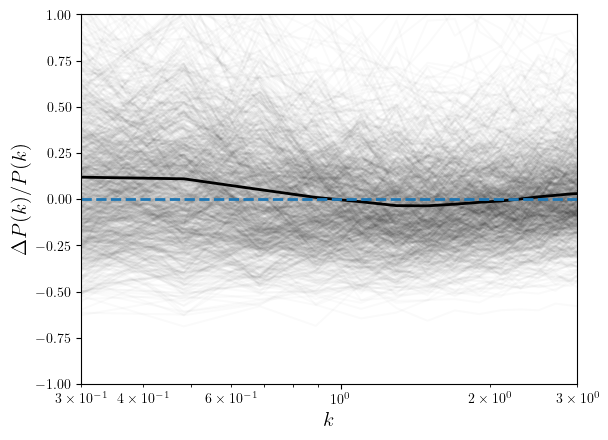

In [27]:
pl.figure()
resid_all = []
for jp in range(len(Pk_all)):
    if (len(Pk_all[jp]) > 0) and (len(Pk_all_truth[jp]) > 0):
        pl.plot(Pk_truth.k3D, (Pk_all[jp] - Pk_all_truth[jp])/Pk_all_truth[jp], color='k', ls='-', alpha=0.02)
        resid_all.append((Pk_all[jp] - Pk_all_truth[jp])/Pk_all_truth[jp])

resid_all = np.vstack(resid_all)
pl.plot(Pk_truth.k3D, np.mean(resid_all, axis=0), color='k', ls='-', alpha=1.0, lw=2.0)
pl.axhline(0.0, ls='--', lw=2.0)
pl.xscale('log')
pl.ylim(-1.0, 1.0)
pl.xlim(0.3, 3)
# pl.scale('log')
pl.xlabel(r'$k$', size=15)
pl.ylabel(r'$\Delta P(k)/P(k)$', size=15)




Text(0, 0.5, '$P(k)$')

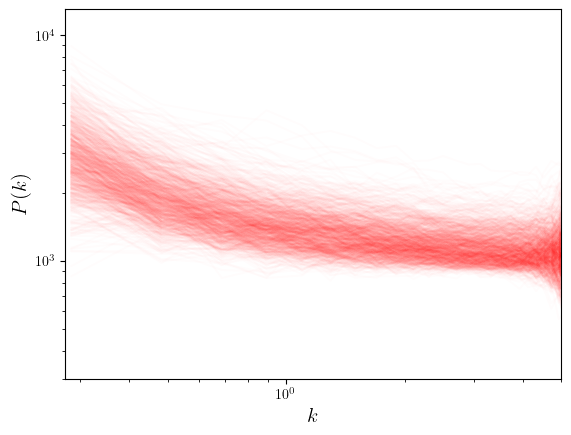

In [28]:
pl.figure()
Pktruth_mean_all = []
for jp in range(len(Pk_all)):
    if (len(Pk_all[jp]) > 0) and (len(Pk_all_truth[jp]) > 0):
        pl.plot(Pk_truth.k3D, Pk_all_truth[jp], color='r', ls='-', alpha=0.01)
        Pktruth_mean_all.append(Pk_all_truth[jp])
        # pl.plot(Pk_truth.k3D, Pk_all_truth[jp], color='b', ls='--', alpha=0.01)
        # resid_all.append((Pk_all[jp] - Pk_all_truth[jp])/Pk_all_truth[jp])
Pktruth_mean_all = np.vstack(Pktruth_mean_all)
# resid_all = np.vstack(resid_all)
# pl.plot(Pk_truth.k3D, np.mean(resid_all, axis=0), color='k', ls='-', alpha=1.0, lw=2.0)
pl.xscale('log')
pl.yscale('log')
# pl.ylim(-0.5, 0.5)
pl.xlim(0.275, 5)
pl.ylim(3e2, 1.3e4)
# pl.scale('log')
pl.xlabel(r'$k$', size=15)
pl.ylabel(r'$P(k)$', size=15)
# pl.title(r'Truth', size)



Text(0, 0.5, '$P(k)$')

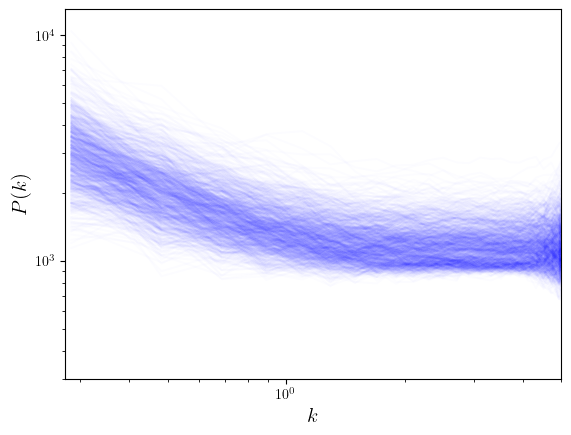

In [29]:
pl.figure()
Pk_mean_all = []
for jp in range(len(Pk_all)):
    if (len(Pk_all[jp]) > 0) and (len(Pk_all_truth[jp]) > 0):
        pl.plot(Pk_truth.k3D, Pk_all[jp], color='b', ls='-', alpha=0.01)
        Pk_mean_all.append(Pk_all[jp])
        # pl.plot(Pk_truth.k3D, Pk_all_truth[jp], color='b', ls='--', alpha=0.01)
        # resid_all.append((Pk_all[jp] - Pk_all_truth[jp])/Pk_all_truth[jp])
Pk_mean_all = np.vstack(Pk_mean_all)
# resid_all = np.vstack(resid_all)
# pl.plot(Pk_truth.k3D, np.mean(resid_all, axis=0), color='k', ls='-', alpha=1.0, lw=2.0)
pl.xscale('log')
pl.yscale('log')
# pl.ylim(-0.5, 0.5)
pl.xlim(0.275, 5)
pl.ylim(3e2, 1.3e4)
# pl.scale('log')
pl.xlabel(r'$k$', size=15)
pl.ylabel(r'$P(k)$', size=15)
# pl.title(r'Truth', size)



Text(0, 0.5, '$P(k)$')

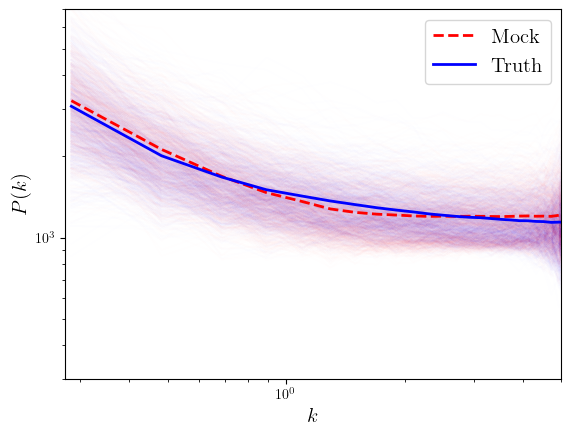

In [32]:
pl.figure()
for jp in range(len(Pk_all)):
    if (len(Pk_all[jp]) > 0) and (len(Pk_all_truth[jp]) > 0):
        pl.plot(Pk_truth.k3D, Pk_all[jp], color='r', ls='-', alpha=0.004)
        # Pk_mean_all.append(Pk_all[jp])

Pktruth_mean_all = []
for jp in range(len(Pk_all)):
    if (len(Pk_all[jp]) > 0) and (len(Pk_all_truth[jp]) > 0):
        pl.plot(Pk_truth.k3D, Pk_all_truth[jp], color='b', ls='-', alpha=0.004)
        Pktruth_mean_all.append(Pk_all_truth[jp])

# Pk_mean_all = []
# for jp in range(len(Pk_all)):
    # if (len(Pk_all[jp]) > 0) and (len(Pk_all_truth[jp]) > 0):
        # pl.plot(Pk_truth.k3D, Pk_all[jp], color='b', ls='-', alpha=0.01)
        # Pk_mean_all.append(Pk_all[jp])
        # pl.plot(Pk_truth.k3D, Pk_all_truth[jp], color='b', ls='--', alpha=0.01)
        # resid_all.append((Pk_all[jp] - Pk_all_truth[jp])/Pk_all_truth[jp])
# Pk_mean_all = np.vstack(Pk_mean_all)
# resid_all = np.vstack(resid_all)
pl.plot(Pk_truth.k3D, np.mean(Pk_mean_all, axis=0), color='r', ls='--', alpha=1.0, lw=2.0, label=r'Mock')
pl.plot(Pk_truth.k3D, np.mean(Pktruth_mean_all, axis=0), color='b', ls='-', alpha=1.0, lw=2.0, label=r'Truth')
pl.xscale('log')
pl.yscale('log')
# pl.ylim(-0.5, 0.5)
pl.xlim(0.275, 5)
pl.ylim(3e2, 7e3)
pl.legend(fontsize=15)
# pl.scale('log')
pl.xlabel(r'$k$', size=15)
pl.ylabel(r'$P(k)$', size=15)
# pl.title(r'Truth', size)



In [33]:
np.mean(Pk_mean_all, axis=0)/np.mean(Pktruth_mean_all, axis=0)


array([1.0486252 , 1.05577959, 1.00665098, 0.97575422, 0.9546787 ,
       0.93452781, 0.93591016, 0.94635405, 0.95848757, 0.96656779,
       0.97886587, 0.99196451, 1.00044523, 1.00899766, 1.0120348 ,
       1.01731845, 1.02384885, 1.03089531, 1.03986128, 1.04235678,
       1.04500534, 1.04772846, 1.05269957, 1.06006241, 1.05776604,
       1.04989725, 1.0576422 ])

In [39]:
Mhalo_all_truth_concat = []
for jv in range(len(Mhalo_all_truth)):
    Mhalo_all_truth_concat.extend(Mhalo_all_truth[jv])

Mhalo_all_concat = []
for jv in range(len(Mhalo_all)):
    Mhalo_all_concat.extend(Mhalo_all[jv])    


Text(0.5, 1.0, 'High density voxels, $\\bar{\\delta}_{{\\rm 32Mpc}/h} > 1.3$')

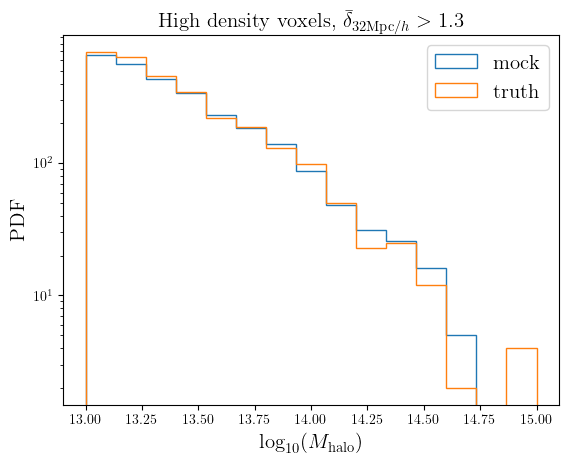

In [40]:
pl.figure()
_ = pl.hist(Mhalo_all_concat, bins=15, range=(lgMin, 15),  histtype='step', label='mock')
# _ = pl.hist(lgMsim_truth, bins=15, range=(lgMin, 15), density=True, histtype='step', label='truth')
_ = pl.hist(Mhalo_all_truth_concat, bins=15, range=(lgMin, 15), histtype='step', label='truth')
pl.yscale('log')
pl.legend(fontsize=15)
pl.xlabel(r'$\log_{10}(M_{\rm halo})$', size=15)
pl.ylabel(r'PDF', size=15)
pl.title(r'High density voxels, $\bar{\delta}_{{\rm 32Mpc}/h} > 1.3$', size=15)






In [57]:
Mhalo_all_concat_low = []
Mhalo_all_concat_mid = []
Mhalo_all_concat_high = []
for jv in indlow:
    Mhalo_all_concat_low.extend(Mhalo_all[jv])

for jv in indmid:
    Mhalo_all_concat_mid.extend(Mhalo_all[jv])

for jv in indhigh:
    Mhalo_all_concat_high.extend(Mhalo_all[jv])
    

In [58]:
# Mhalo_all_truth_concat = []
# for jv in range(len(Mhalo_all_truth)):
    # Mhalo_all_truth_concat.extend(Mhalo_all_truth[jv])

Mhalo_all_truth_concat_low = []
Mhalo_all_truth_concat_mid = []
Mhalo_all_truth_concat_high = []

for jv in indlow:
    Mhalo_all_truth_concat_low.extend(Mhalo_all_truth[jv])

for jv in indmid:
    Mhalo_all_truth_concat_mid.extend(Mhalo_all_truth[jv])

for jv in indhigh:
    Mhalo_all_truth_concat_high.extend(Mhalo_all_truth[jv])

    



Text(0.5, 1.0, 'High density voxels, $\\bar{\\delta}_{{\\rm 32Mpc}/h} > 1.3$')

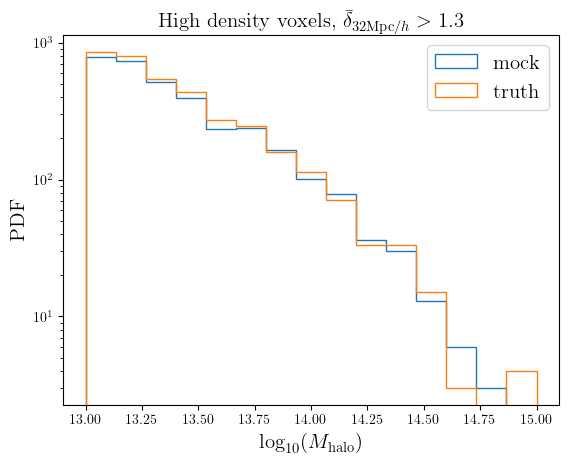

In [59]:
pl.figure()
_ = pl.hist(Mhalo_all_concat_high, bins=15, range=(lgMin, 15),  histtype='step', label='mock')
# _ = pl.hist(lgMsim_truth, bins=15, range=(lgMin, 15), density=True, histtype='step', label='truth')
_ = pl.hist(Mhalo_all_truth_concat_high, bins=15, range=(lgMin, 15), histtype='step', label='truth')
pl.yscale('log')
pl.legend(fontsize=15)
pl.xlabel(r'$\log_{10}(M_{\rm halo})$', size=15)
pl.ylabel(r'PDF', size=15)
pl.title(r'High density voxels, $\bar{\delta}_{{\rm 32Mpc}/h} > 1.3$', size=15)



Text(0.5, 1.0, 'Mid density voxels, $0.75 < \\bar{\\delta}_{{\\rm 32Mpc}/h} < 1.3$')

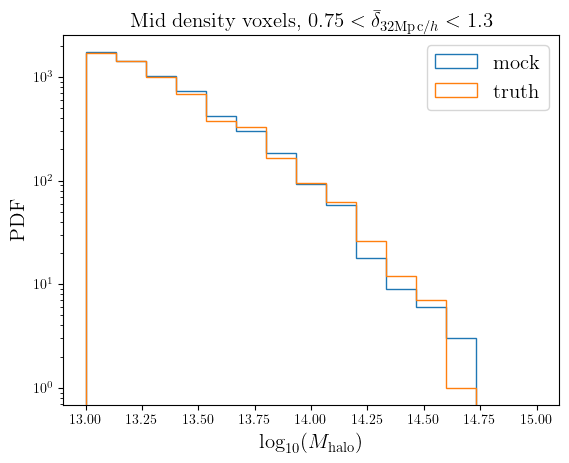

In [60]:
pl.figure()
_ = pl.hist(Mhalo_all_concat_mid, bins=15, range=(lgMin, 15), histtype='step', label='mock')
# _ = pl.hist(lgMsim_truth, bins=15, range=(lgMin, 15), density=True, histtype='step', label='truth')
_ = pl.hist(Mhalo_all_truth_concat_mid, bins=15, range=(lgMin, 15), histtype='step', label='truth')
pl.yscale('log')
pl.legend(fontsize=15)
pl.xlabel(r'$\log_{10}(M_{\rm halo})$', size=15)
pl.ylabel(r'PDF', size=15)
pl.title(r'Mid density voxels, $0.75 < \bar{\delta}_{{\rm 32Mpc}/h} < 1.3$', size=15)



Text(0.5, 1.0, 'Low density voxels, $\\bar{\\delta}_{{\\rm 32Mpc}/h} < 0.75$')

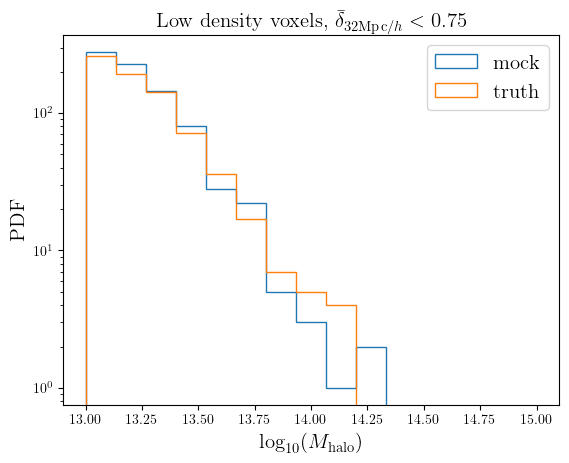

In [61]:
pl.figure()
_ = pl.hist(Mhalo_all_concat_low, bins=15, range=(lgMin, 15), histtype='step', label='mock')
# _ = pl.hist(lgMsim_truth, bins=15, range=(lgMin, 15), density=True, histtype='step', label='truth')
_ = pl.hist(Mhalo_all_truth_concat_low, bins=15, range=(lgMin, 15), histtype='step', label='truth')
pl.yscale('log')
pl.legend(fontsize=15)
pl.xlabel(r'$\log_{10}(M_{\rm halo})$', size=15)
pl.ylabel(r'PDF', size=15)
pl.title(r'Low density voxels, $\bar{\delta}_{{\rm 32Mpc}/h} < 0.75$', size=15)



In [64]:
from tqdm import tqdm
indhigh_to_plot = indhigh[::4]
idx_inp = torch.zeros((1, 1), dtype=torch.long, device=dev)
nvox_samp = len(indhigh_to_plot)
max_new_tokens = 160
end_token = 129
idx_all = []
for jv in tqdm(range(nvox_samp)):
    ind_jv = indhigh_to_plot[jv]
    DM_val_jv = DM_val[ind_jv,...]
    idx = idx_inp
    for _ in range(max_new_tokens):
        # crop idx to the last block_size tokens
        idx_cond = idx[:, -block_size:]
        # get the predictions
        logits, loss = model(idx_cond, DM_val_jv.unsqueeze(0))
        # focus only on the last time step
        logits = logits[:, -1, :] # becomes (B, C)
        # apply softmax to get probabilities
        probs = F.softmax(logits, dim=-1) # (B, C)
        # sample from the distribution
        idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
        # append sampled index to the running sequence
        if idx_next == end_token:
            break
        idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
    idx_all.append(idx)
    



(tensor([  0,  54,  53, 121, 106, 130,  41,  11,  99,  19, 130,  20,  68, 123,
         122, 130,  19,  69, 104, 119, 130,  17, 119, 121, 117, 130,   8,  77,
         100, 110, 130,   7,  70, 125,  37, 130,   6,  54, 113,  95, 130,   5,
          83, 126,   4, 130,   2,  71, 102, 119, 129,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1], device='cuda:0'),
 tensor([[  0,  60,  59, 119, 104, 130,  44,  59, 118, 109, 130,  35,  35

In [84]:
indhigh


array([   14,    18,    20, ..., 16353, 16374, 16382])